# Face Recognition

In [6]:
import cv2 as cv
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras_facenet import FaceNet
from mtcnn.mtcnn import MTCNN

In [7]:
#INITIALIZE
facenet = FaceNet()
embedding_path = os.path.join(os.getcwd(),'embeddings','face_embeddings.npz')
faces_embeddings = np.load(embedding_path)
Y = faces_embeddings['arr_1']
encoder = LabelEncoder()
encoder.fit(Y)
model_path = os.path.join(os.getcwd(),'model','svm_model.pkl')
model = pickle.load(open(model_path, 'rb'))

In [8]:
def get_embedding(face_img):
    embedder = FaceNet()
    face_img = face_img.astype('float32')  # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat = embedder.embeddings(face_img)
    return yhat[0]  # 512D image (1x1x512)


def recognize_image(image_path, image_name):
    im = cv.imread(image_path)
    if im is None:
        print("File Not Found")
    else:
        #show the prediction results
        confidence_threshold = 0.55
        name = 'unknown'
        confidence_percentage =0.0
        font = cv.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_color = (255, 0, 0)  # red

        im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        detector = MTCNN()
        x, y, w, h = detector.detect_faces(im)[0]['box']
        face = im[y:y + h, x:x + w]
        face = cv.resize(face, (160, 160))
        face_embedding = get_embedding(face)
        face_embedding = [face_embedding]
        ypreds = model.predict(face_embedding)

        conf_score = model.predict_proba(face_embedding)[0]
        for i, value in np.ndenumerate(conf_score):
            ypreds[0] = i[0]
            label = encoder.inverse_transform(ypreds)[0]
            print(f"Person:{label} confidence:{round(value*100,2)}%")
            if value > confidence_threshold:
                name=label
                text_color = (0,128,0) #green
                confidence_percentage = round(value*100,2)

        cv.rectangle(im, (x, y), (x + w, y + h), text_color, 3)
        # Postion text below bounding box
        # Get the size of the text to ensure it fits and for proper vertical offset
        (text_width, text_height), baseline = cv.getTextSize(name, font, font_scale, font_thickness)
        text_x = x
        text_y = y + h + text_height + 5  # 5 pixels margin below the box
        cv.putText(im, str(name), (text_x, text_y), cv.FONT_HERSHEY_SIMPLEX,
                   1, text_color, 2, cv.LINE_AA)
        if name != 'unknown':
            plt.title(f"detected person: {name} with confidence score: {confidence_percentage}%")
        else:
            plt.title("unknown person")
        plt.imshow(im)
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Person:anna confidence:13.59%
Person:aswin confidence:5.91%
Person:tiffany confidence:11.97%
Person:tom cruise confidence:8.78%
Person:vijay sethupathi confidence:59.74%


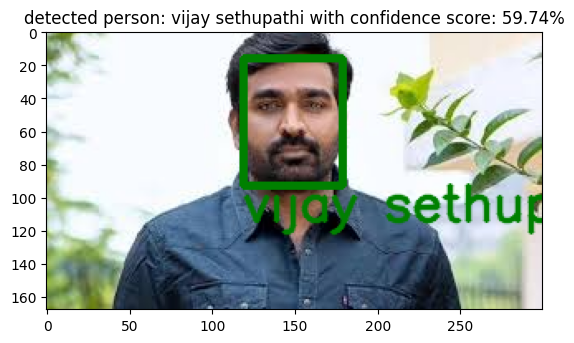

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Person:anna confidence:6.66%
Person:aswin confidence:4.26%
Person:tiffany confidence:73.92%
Person:tom cruise confidence:7.16%
Person:vijay sethupathi confidence:7.99%


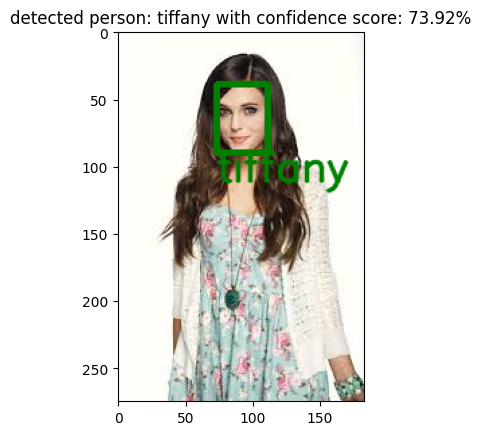

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Person:anna confidence:6.98%
Person:aswin confidence:5.3%
Person:tiffany confidence:69.71%
Person:tom cruise confidence:9.6%
Person:vijay sethupathi confidence:8.41%


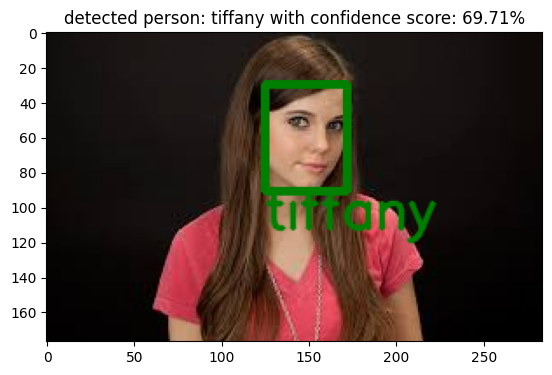

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Person:anna confidence:23.14%
Person:aswin confidence:15.06%
Person:tiffany confidence:25.87%
Person:tom cruise confidence:23.36%
Person:vijay sethupathi confidence:12.56%


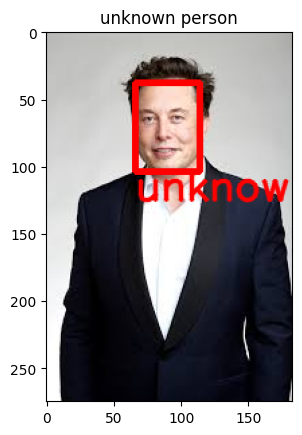

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Person:anna confidence:7.91%
Person:aswin confidence:61.55%
Person:tiffany confidence:9.48%
Person:tom cruise confidence:8.26%
Person:vijay sethupathi confidence:12.8%


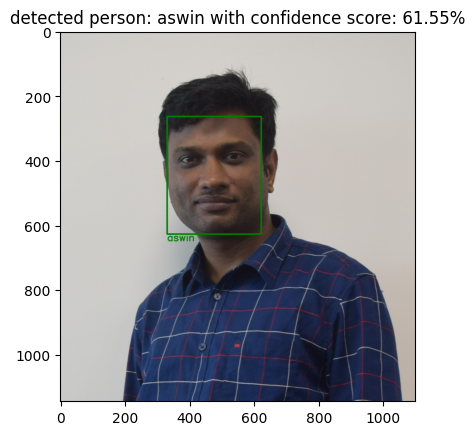

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Person:anna confidence:40.5%
Person:aswin confidence:9.16%
Person:tiffany confidence:20.63%
Person:tom cruise confidence:13.54%
Person:vijay sethupathi confidence:16.19%


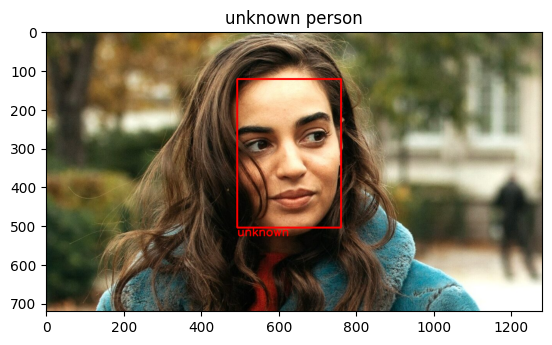

In [9]:
def recognize_folder(folder_path):
    for file_name in os.listdir(folder_path):
        path = os.path.join(folder_path, file_name)
        recognize_image(path, file_name)

recognize_folder(os.path.join(os.getcwd(),"test images"))